## Online Video Game Sales

Analysis of global video game sales and reviews for Ice, focusing on identifying patterns that drive game success and planning effective advertising campaigns.


### Step 1: Load data

In [95]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [96]:
games= pd.read_csv('games.csv')

In [97]:
#games

In [98]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Step 2: Data preprocessing

In [99]:
# Make column names lowercase 
games.columns=games.columns.str.lower()
games.info()

## Using str because pandas object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Check for missing values

In [100]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [101]:
## Names column 

games['name'].describe()
# correct data type used


count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [102]:
### Name column: Drop 2 rows 

games = games.dropna(subset=['name'])

## only 2 missing rows will drop these rows 

In [103]:
## Platform column

games['platform'].describe()
# correct data type



count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

In [104]:
## year of release column

games['year_of_release'].describe()
# incorrect data type for year

print(games['year_of_release'] .value_counts())




year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: count, dtype: int64


In [105]:
## Year of release is categorical feature so I will drop missing rows

games=games.dropna(subset=['year_of_release'])

In [106]:
### Change year of release data type

games['year_of_release'] = games['year_of_release'].astype(int)
games.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [107]:
## Genre column

games['genre'].describe()
#correct data type 

print(games['genre'] .value_counts())


genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: count, dtype: int64


In [108]:
### Drop two missing rows

games=games.dropna(subset=['genre'])

In [109]:
## na_sales column

games['na_sales'].describe()
# correct data type

print(games['na_sales'] .value_counts())



na_sales
0.00     4449
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
5.39        1
3.03        1
3.56        1
2.82        1
41.36       1
Name: count, Length: 401, dtype: int64


In [110]:
## eu_sales

games['eu_sales'].describe()
#correct data type

print(games['eu_sales'] .value_counts())



eu_sales
0.00     5766
0.01     1467
0.02     1290
0.03      911
0.04      702
         ... 
1.52        1
5.75        1
2.17        1
2.78        1
28.96       1
Name: count, Length: 307, dtype: int64


In [111]:
## jp_sales

games['jp_sales'].describe()
# correct data type

print(games['jp_sales'] .value_counts())



jp_sales
0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: count, Length: 244, dtype: int64


In [112]:
# other sales

games['other_sales'].describe()
# correct data type

print(games['other_sales'] .value_counts())


other_sales
0.00    6492
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: count, Length: 155, dtype: int64


In [113]:
## Critic score column

games['critic_score'].describe()
# correct data type

print(games['critic_score'].value_counts())

## There are 8578 missing values in the 'critic_score' column. As with user_score NaNs, it seems like we need to leave the NaNs in place, as I believe that it would be best to consider only those games for which scores are already present, rather than try to fill in the NaNs. Our reasoning concerns how critic scores tend to fluctuate between platforms, as well as between individual critics.

critic_score
70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
20.0      3
29.0      3
21.0      1
17.0      1
13.0      1
Name: count, Length: 81, dtype: int64


In [114]:
## User score column

games['user_score'].describe()
# need to change data type

print(games['user_score'].value_counts())


##There are 9123 NaNs in the 'user_score' column, which is better not to fill at all. We would be able to get a better representation of how users' ratings relate to the success of a game if we use the ratings that are in place, rather than try to repalce the NaNs with user_ratings.

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64


In [115]:
# Convert columns to numeric
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')


In [116]:
### Change data type to float 

games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [117]:
## rating column 

games['rating'].describe()
# correct data type

print(games['rating'] .value_counts())



rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64


In [118]:
games['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

In [119]:
### Fill missing categorical values 
#### Used the fillna method to deal with missing data because there is no meaningful way to find out the names

games['rating'] = games['rating'].fillna(value='')

In [120]:
games.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [121]:
# Create a new column for total_sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 
games.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


## Step 3: Analyses

#### (3.1) Look at how many games were released in different years. Is the data for every period significant?


In [169]:

games_year_release = games.groupby('year_of_release')['name'].nunique()
print(games_year_release)

''' from 1980 to 1993 there were much fewer games released. However, from 1994 onwards there is a significnat 
increase in games being released.'''

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      41
1993      59
1994     117
1995     215
1996     258
1997     282
1998     364
1999     326
2000     325
2001     428
2002     631
2003     546
2004     550
2005     657
2006     773
2007     884
2008    1039
2009    1001
2010     900
2011     779
2012     446
2013     335
2014     319
2015     362
2016     297
Name: name, dtype: int64


' from 1980 to 1993 there were much fewer games released. However, from 1994 onwards there is a significnat \nincrease in games being released.'

In [123]:
type(games_year_release)

pandas.core.series.Series

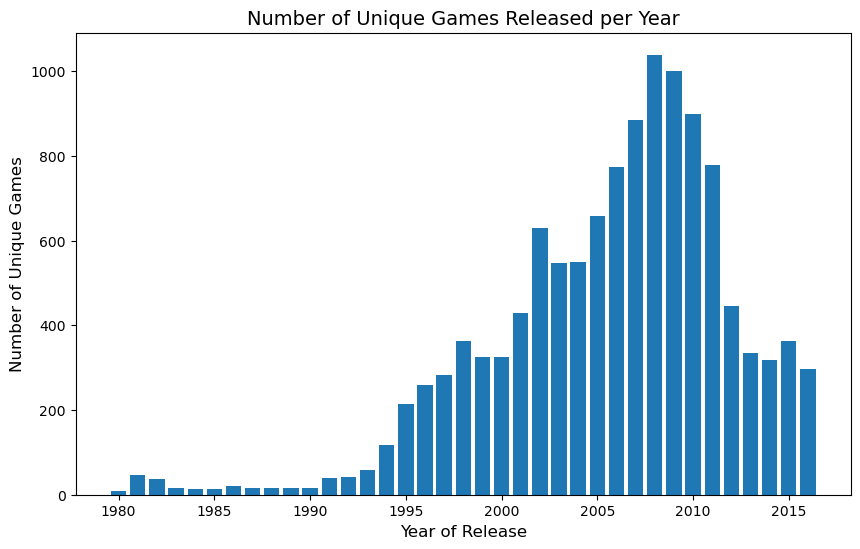


The peak in game releases around 2007-2009 could be tied to major console releases, 
possibly the growth of mobile gaming.



In [124]:
#matplotlib visualization

plt.figure(figsize=(10,6))
plt.bar(games_year_release.index, games_year_release.values)
plt.title('Number of Unique Games Released per Year', fontsize=14)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Number of Unique Games', fontsize=12)
plt.show()

print('''
The peak in game releases around 2007-2009 could be tied to major console releases, 
possibly the growth of mobile gaming.
''')


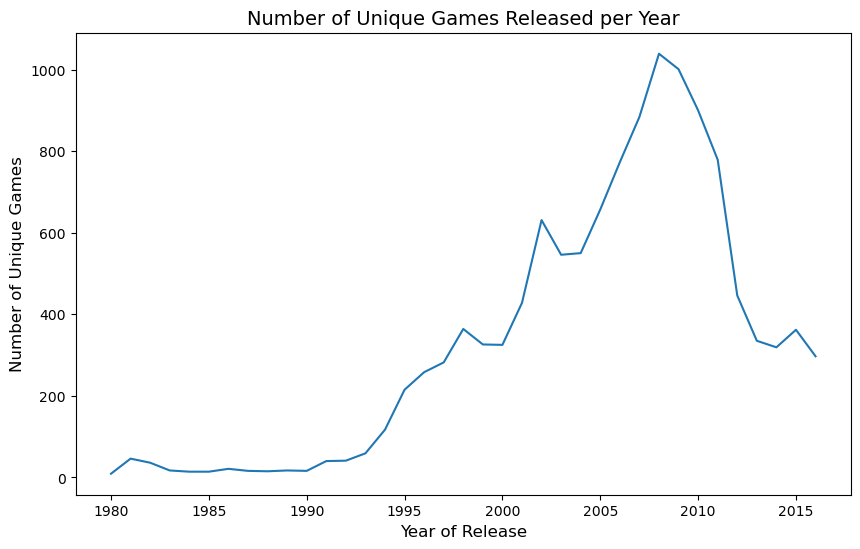

In [125]:
#pandas visualization

plt.figure(figsize=(10,6))

games_year_release.plot(kind='line')


plt.title('Number of Unique Games Released per Year', fontsize=14)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Number of Unique Games', fontsize=12)


plt.show()


#### (3.2) Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.


In [126]:
## Analyze total sales by platform

# Group by platform and sum the total sales
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()

# Sort the platforms by total sales 
platform_sales_sorted = platform_sales.sort_values(by='total_sales', ascending=False)

print(platform_sales_sorted.head(10))

# Best performing platforms: PS2, x360, PS3, Wii, and DS.

   platform  total_sales
16      PS2      1233.56
28     X360       961.24
17      PS3       931.34
26      Wii       891.18
4        DS       802.78
15       PS       727.58
18      PS4       314.14
6       GBA       312.88
19      PSP       289.53
2       3DS       257.81


In [127]:
## Platforms with the greatest total sales   
   
# Filtering the DataFrame to select best performing platforms 
best_total_sales = games[(games['platform'] == 'PS2') | (games['platform'] == 'X360') | (games['platform'] == 'PS3') |
                           (games['platform'] == 'WII') | (games['platform'] == 'PS') | (games['platform'] == 'DS')
]


In [128]:
best_total_sales['platform'].unique()

array(['DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

In [129]:
## Group by year to show the distribution of sales over time forbest performing platforms

best_total_year = best_total_sales.groupby('year_of_release')['total_sales'].sum().reset_index()

best_total_year

,year_of_release,total_sales
0,1985,0.02
1,1994,6.03
2,1995,35.96
3,1996,94.70
4,1997,136.17
5,1998,169.49
6,1999,144.53
7,2000,135.54
8,2001,202.02
9,2002,212.05


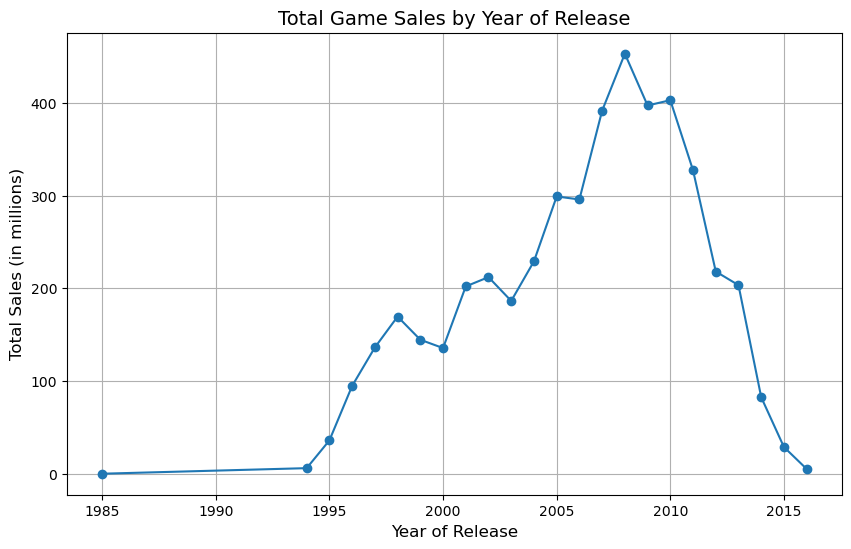

In [130]:
# matplotlib visualization

plt.figure(figsize=(10,6))
plt.plot(best_total_year['year_of_release'], best_total_year['total_sales'], marker='o')

# Add title and labels
plt.title('Total Game Sales by Year of Release', fontsize=14)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Total Sales (in millions)', fontsize=12)

plt.grid(True)
plt.show()

# The year 2008 represents the peak in total game sales, likely influenced by key game releases or platform popularity.

# From 2010 onward, there is a notable decline in game sales, which could indicate market saturation or changes in consumer behavior.


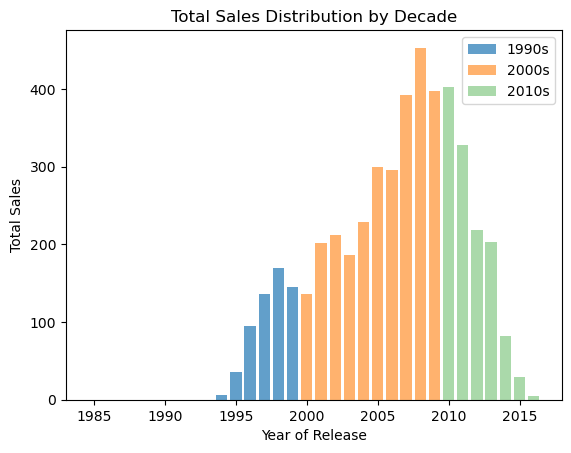

In [131]:
## Bar graph for aggregated data: matplotlib vizualization

# Filter the data for different time periods
best_total_year_1990s = best_total_year[best_total_year['year_of_release'] < 2000]
best_total_year_2000s = best_total_year[(best_total_year['year_of_release'] >= 2000) & (best_total_year['year_of_release'] < 2010)]
best_total_year_2010s = best_total_year[best_total_year['year_of_release'] >= 2010]

# Plotting the bar chart for total sales in the 90s
plt.bar(best_total_year_1990s['year_of_release'], best_total_year_1990s['total_sales'], alpha=0.7, label='1990s')

# Plotting the bar chart for total sales in the 2000s
plt.bar(best_total_year_2000s['year_of_release'], best_total_year_2000s['total_sales'], alpha=0.6, label='2000s')

# Plotting the bar chart for total sales in the 2010s
plt.bar(best_total_year_2010s['year_of_release'], best_total_year_2010s['total_sales'], alpha=0.4, label='2010s')

# Adding labels and title
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Total Sales Distribution by Decade')


plt.legend()
plt.show()


# There is an increase in total sales in the 2000s, with a peak around 2007–2009.
# After the peak in the late 2000s, total sales declines in the 2010s.

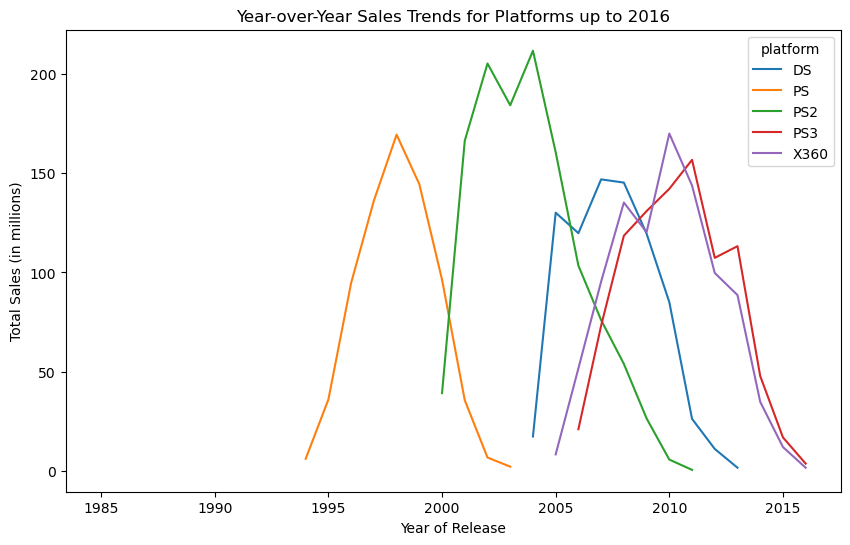

In [132]:
## Analyze year-over-year sales trends (pandas visualization)


# Group by platform and year of release, and sum sales per year
platform_sales_by_year = best_total_sales.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plot the sales trends over the years for the top platforms
platform_sales_by_year.plot(kind='line', figsize=(10, 6))
plt.title('Year-over-Year Sales Trends for Platforms up to 2016')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.show()

# PS2 had a peak around 2005
# Xbox360 and PS3 peaked around the same time, around 2010
# DS peaked around 2006–2007


#### (3.2) Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [133]:
## Identify platforms with declining sales

# Find platforms where sales were high in earlier years but have dropped sharply in recent years (2015-2016)
recent_years = games[games['year_of_release'] >= 2015]
platforms_recent_sales = recent_years.groupby('platform')['total_sales'].sum().reset_index()

# Set a threshold for platforms with declining sales, e.g., less than 1 million in sales in recent years
platforms_declining = platforms_recent_sales[platforms_recent_sales['total_sales'] < 1]['platform'].tolist()

# These are the platforms that had high sales earlier but have declining sales recently
print("Platforms with declining sales in 2015-2016:", platforms_declining)


# Platforms that once had high sales but are declining might not be a good focus for the 2017 campaign.



Platforms with declining sales in 2015-2016: ['PSP']


In [134]:
## Platform longevity

# Calculate the first and last year of release for each platform to understand platform longevity
platform_length = games.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()

# Calculate how many years a platform has been active
platform_length['duration'] = platform_length['max'] - platform_length['min']

# Sort by lifecycle duration to see which platforms have been around the longest
platform_length_sorted = platform_length.sort_values(by='duration', ascending=False)

# Display platforms with the longest lifecycles
print(platform_length_sorted.head(10))


platform_length['duration'].mean()

## The average platform lifecycle is around 8 years

   platform   min   max  duration
13       PC  1985  2016        31
4        DS  1985  2013        28
5        GB  1988  2001        13
28     X360  2005  2016        11
19      PSP  2004  2015        11
16      PS2  2000  2011        11
11      NES  1983  1994        11
3        DC  1998  2008        10
26      Wii  2006  2016        10
17      PS3  2006  2016        10


7.612903225806452

####  (3.3) and (3.4) Determine what period you should take data for. 


#####  Since I am forecasting 2016 sales, I will use data from 2012.

In [135]:
## Filter data from 2012 to 2015

games2 = games[games['year_of_release'] >= 2012]

#### (3.5) Which platforms are leading in sales? Which ones are growing or shrinking? 

In [136]:
## Analyze total sales by platform

# Group by platform and sum the total sales
platform_sales3 = games2.groupby('platform')['total_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
platform_sales_sorted3 = platform_sales3.sort_values(by='total_sales', ascending=False)

# Display the top platforms by total sales
#print(platform_sales_sorted3.head(10))

print(platform_sales_sorted3)

# Potentially profitable platforms include PS4, PS3, and X360
# DS and PSP look like they are declining in sales 

   platform  total_sales
4       PS4       314.14
3       PS3       288.79
9      X360       236.54
0       3DS       194.61
10     XOne       159.32
8      WiiU        82.19
2        PC        62.65
6       PSV        49.18
7       Wii        35.37
1        DS        12.55
5       PSP        11.19


#### (3.6) Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? 

In [137]:
## Filter profitable platforms      

games4 = games2[(games2['platform'] == 'X360') | (games2['platform'] == 'PS3') | (games2['platform'] == 'PS4')
             | (games2['platform'] == '3DS')  | (games2['platform'] == 'XOne') 
]

In [138]:
games4['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne'], dtype=object)

C:\Users\candi\AppData\Local\Temp\ipykernel_24176\1642786809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='total_sales', data=games4, palette=palette,showfliers = False) # remove outliers from box plot
C:\Users\candi\AppData\Local\Temp\ipykernel_24176\1642786809.py:6: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sns.boxplot(x='platform', y='total_sales', data=games4, palette=palette,showfliers = False) # remove outliers from box plot


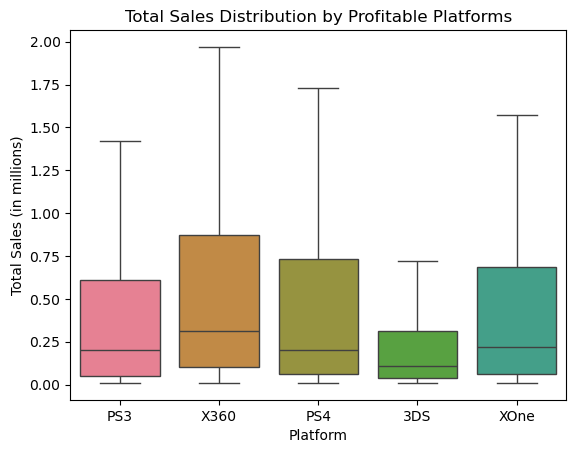

X360: Shows the highest median and the widest spread of sales data, indicating both strong sales performance and variability in sales.
PS3: Has a smaller spread and lower median compared to newer platforms like X360, PS4, and XOne, suggesting more consistent but lower sales.
PS4 and XOne: These platforms show similar median sales and spread, indicating comparable sales performance and variability.
3DS: Displays the lowest total sales and has a much smaller range of sales, indicating less variability and lower overall performance compared to home consoles like X360 and PS4.



In [139]:


#plt.figure(figsize=(15, 10))

# Color palette
palette = sns.color_palette('husl', 9) 

sns.boxplot(x='platform', y='total_sales', data=games4, palette=palette,showfliers = False) # remove outliers from box plot

# labels and title
plt.title('Total Sales Distribution by Profitable Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')


plt.show()


print('''X360: Shows the highest median and the widest spread of sales data, indicating both strong sales performance and variability in sales.
PS3: Has a smaller spread and lower median compared to newer platforms like X360, PS4, and XOne, suggesting more consistent but lower sales.
PS4 and XOne: These platforms show similar median sales and spread, indicating comparable sales performance and variability.
3DS: Displays the lowest total sales and has a much smaller range of sales, indicating less variability and lower overall performance compared to home consoles like X360 and PS4.
''')


##### (3.7)Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

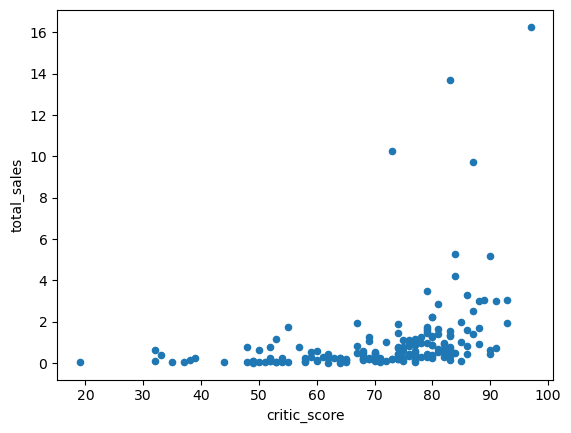


Most of the data points are clustered towards the lower end of the y-axis (sales below 2 million) and the mid-to-high end of the x-axis (critic scores between 60 and 90).
There are a few outliers with higher total sales (above 10 million), but these are rare.
There is no strong linear relationship visible between critic scores and total sales. 
It seems that games with higher critic scores don't necessarily result in significantly 
higher sales, at least not in a clear linear fashion.



In [140]:

x360 = games4[games4['platform'] == 'X360']

x360.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()

print('''
Most of the data points are clustered towards the lower end of the y-axis (sales below 2 million) and the mid-to-high end of the x-axis (critic scores between 60 and 90).
There are a few outliers with higher total sales (above 10 million), but these are rare.
There is no strong linear relationship visible between critic scores and total sales. 
It seems that games with higher critic scores don't necessarily result in significantly 
higher sales, at least not in a clear linear fashion.
''')

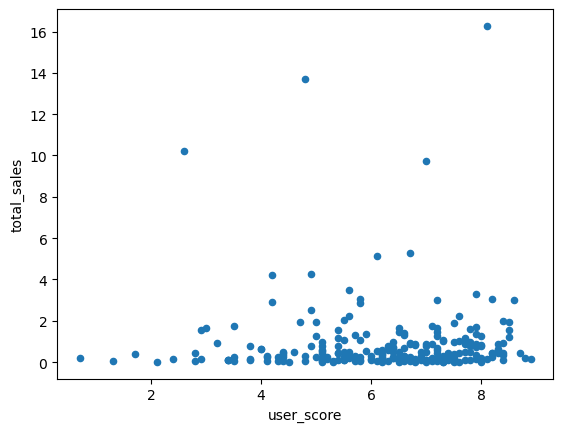


Some games with low user scores still achieve high sales.
Other factors might be more important: User scores alone may not be a key factor in 
driving sales, and other elements (e.g., marketing, platform availability, game genre)
could have more influence.



In [141]:

x360.plot(x='user_score', y='total_sales', kind='scatter')
plt.show()

print('''
Some games with low user scores still achieve high sales.
Other factors might be more important: User scores alone may not be a key factor in 
driving sales, and other elements (e.g., marketing, platform availability, game genre)
could have more influence.
''')


##### (3.8) Keeping your conclusions in mind, compare the sales of the same games on other platforms.

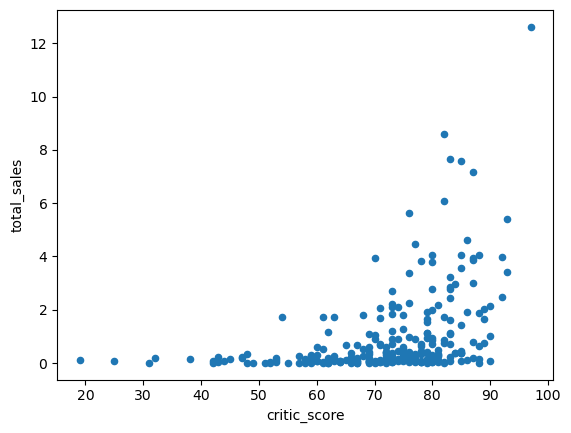


Although there is a general upward trend in sales with increasing critic scores, the
relationship is not strongly linear. Games with higher critic scores don’t always achieve
higher sales, and there is considerable variability, suggesting other factors may
also influence total sales.




In [142]:
#x360 = games4[games4['platform'] == 'X360']
#x360['name'].nunique()
#for name in x360['name']:
    #print(name)


ps2 = games4[games4['platform'] == 'PS4']

ps2.plot(x='critic_score', y='total_sales', kind='scatter')
plt.show()


print('''
Although there is a general upward trend in sales with increasing critic scores, the
relationship is not strongly linear. Games with higher critic scores don’t always achieve
higher sales, and there is considerable variability, suggesting other factors may
also influence total sales.

''')

In [143]:
# Correlation

selected_columns = games4[['year_of_release', 'total_sales']]
correlation_matrix = selected_columns.corr()

print(correlation_matrix)

# As the value of year_of_release increases (games are released in more recent years), the total_sales tends to decrease.
# However, it is a weak and negative relationship.

                 year_of_release  total_sales
year_of_release         1.000000    -0.109686
total_sales            -0.109686     1.000000


##### (3.9) Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [144]:

# Group by genre and sum the total sales
genre = games4.groupby('genre')['total_sales'].sum().reset_index()

# Sort the platforms by total sales
genre2 = genre.sort_values(by='total_sales', ascending=False)


print(genre2)

# action has the highest total sales followed by sports, and shooter. Puzzle has the lowest sales. 

           genre  total_sales
0         Action       376.25
8        Shooter       282.11
10        Sports       167.81
7   Role-Playing       151.26
3           Misc        48.78
6         Racing        42.18
2       Fighting        35.53
4       Platform        34.13
9     Simulation        25.16
1      Adventure        22.68
11      Strategy         4.79
5         Puzzle         2.72


C:\Users\candi\AppData\Local\Temp\ipykernel_24176\2306570390.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='total_sales', data=games4, showfliers = False, palette='Set2')


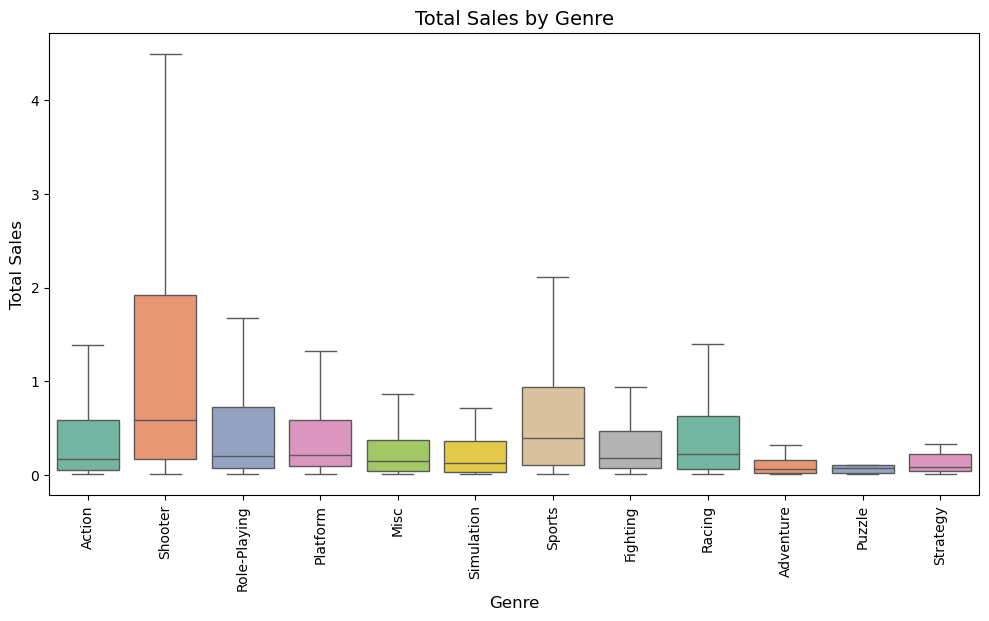

The Shooter genre has a significantly higher median total sales compared to other
genres, indicated by the taller box. The Action genre also has a relatively large spread, 
but its median sales are lower compared to Shooter. Genres like Racing, Role-Playing, and Sports
have similar distributions, with moderate medians and fewer extreme variations in sales.
Some genres, like Puzzle and Adventure, have consistently lower total sales across their
ranges, with smaller IQRs and lower medians.



In [145]:
## Seaborn visualization


plt.figure(figsize=(12,6))

# boxplot using seaborn library
sns.boxplot(x='genre', y='total_sales', data=games4, showfliers = False, palette='Set2')

# Rotate the x-axis 
plt.xticks(rotation=90)


plt.title('Total Sales by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.show()

print('''The Shooter genre has a significantly higher median total sales compared to other
genres, indicated by the taller box. The Action genre also has a relatively large spread, 
but its median sales are lower compared to Shooter. Genres like Racing, Role-Playing, and Sports
have similar distributions, with moderate medians and fewer extreme variations in sales.
Some genres, like Puzzle and Adventure, have consistently lower total sales across their
ranges, with smaller IQRs and lower medians.
''')

### Step 4. Create a user profile for each region

For each region:

##### (4.1) The top five platforms. Describe variations in their market shares from region to region.


In [146]:
games4.info() # using data from >=2012 and only selected profitable platforms 

<class 'pandas.core.frame.DataFrame'>
Index: 1820 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1820 non-null   object 
 1   platform         1820 non-null   object 
 2   year_of_release  1820 non-null   int32  
 3   genre            1820 non-null   object 
 4   na_sales         1820 non-null   float64
 5   eu_sales         1820 non-null   float64
 6   jp_sales         1820 non-null   float64
 7   other_sales      1820 non-null   float64
 8   critic_score     910 non-null    float64
 9   user_score       1071 non-null   float64
 10  rating           1820 non-null   object 
 11  total_sales      1820 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 177.7+ KB


In [147]:
# NA sales
na = games4.groupby('platform')['na_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
na_sorted = na.sort_values(by='na_sales', ascending=False)

# Display the top platforms by total sales
#print(platform_sales_sorted3.head(10))

print(na_sorted.head(5))

## NA sales dominated by Xbox 360, followed by PS4 and PS3

  platform  na_sales
3     X360    140.05
2      PS4    108.74
1      PS3    103.38
4     XOne     93.12
0      3DS     55.31


In [148]:
# EU sales

eu = games4.groupby('platform')['eu_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
eu_sorted = eu.sort_values(by='eu_sales', ascending=False)

# Display the top platforms by total sales
#print(platform_sales_sorted3.head(10))

print(eu_sorted.head(5))

## EU sales dominated by PS4, PS3, and X360



  platform  eu_sales
2      PS4    141.09
1      PS3    106.86
3     X360     74.52
4     XOne     51.59
0      3DS     42.64


In [149]:
# JP sales

jp = games4.groupby('platform')['jp_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
jp_sorted = jp.sort_values(by='jp_sales', ascending=False)

# Display the top platforms by total sales
#print(platform_sales_sorted3.head(10))

print(jp_sorted.head(5))

# Strong preference for 3DS, PS3, PS4

  platform  jp_sales
0      3DS     87.79
1      PS3     35.29
2      PS4     15.96
3     X360      1.57
4     XOne      0.34


##### (4.2) The top five genres. Explain the difference.

In [150]:
# NA sales
na = games4.groupby('genre')['na_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
na_sorted = na.sort_values(by='na_sales', ascending=False)

# Display the top platforms by total sales
#print(platform_sales_sorted3.head(10))

print(na_sorted.head(5))

# Action is top genre in NA region

           genre  na_sales
0         Action    153.47
8        Shooter    136.53
10        Sports     77.65
7   Role-Playing     51.81
3           Misc     22.86


In [151]:
# EU sales

eu = games4.groupby('genre')['eu_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
eu_sorted = eu.sort_values(by='eu_sales', ascending=False)

# Display the top platforms by total sales
#print(platform_sales_sorted3.head(10))

print(eu_sorted.head(5))

## Action is also the most popular genre 


           genre  eu_sales
0         Action    136.51
8        Shooter    102.87
10        Sports     63.30
7   Role-Playing     38.04
6         Racing     22.70


In [152]:
# JP sales

jp = games4.groupby('genre')['jp_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
jp_sorted = jp.sort_values(by='jp_sales', ascending=False)

# Display the top platforms by total sales
#print(platform_sales_sorted3.head(10))

print(jp_sorted.head(5))

# The action genre is also most popular in JP

          genre  jp_sales
7  Role-Playing     49.49
0        Action     40.95
9    Simulation     10.23
8       Shooter      7.58
2      Fighting      7.41


##### (4.3) Do ESRB ratings affect sales in individual regions?

In [153]:
games4['rating'].unique()
# ESRB ratings: E=everyone, M=mature etc

array(['M', '', 'E', 'T', 'E10+'], dtype=object)

In [154]:
## Filter mature and everyone ratings

mature_rating= games4[games4['rating']== 'M']

everyone= games4[games4['rating']== 'E']


In [155]:
# NA sales
na_mature = mature_rating.groupby('platform')['na_sales'].sum().reset_index()
na_everyone = everyone.groupby('platform')['na_sales'].sum().reset_index()

# Sort the platforms by total sales
na_mature = na_mature.sort_values(by='na_sales', ascending=False)
na_everyone= na_everyone.sort_values(by='na_sales', ascending=False)

#print(na_sorted.head(5))
#print(na_everyone.head(5))

# average of the na_sales column
average_sales_mature = na_mature['na_sales'].mean()
print(average_sales_mature)

# average of the na_sales column
average_sales_everyone = na_everyone['na_sales'].mean()
print(average_sales_everyone)


## In the NA region: Movies that are rated as 'mature' have higher sales than movies rated for 'everyone'

42.822
18.678000000000004


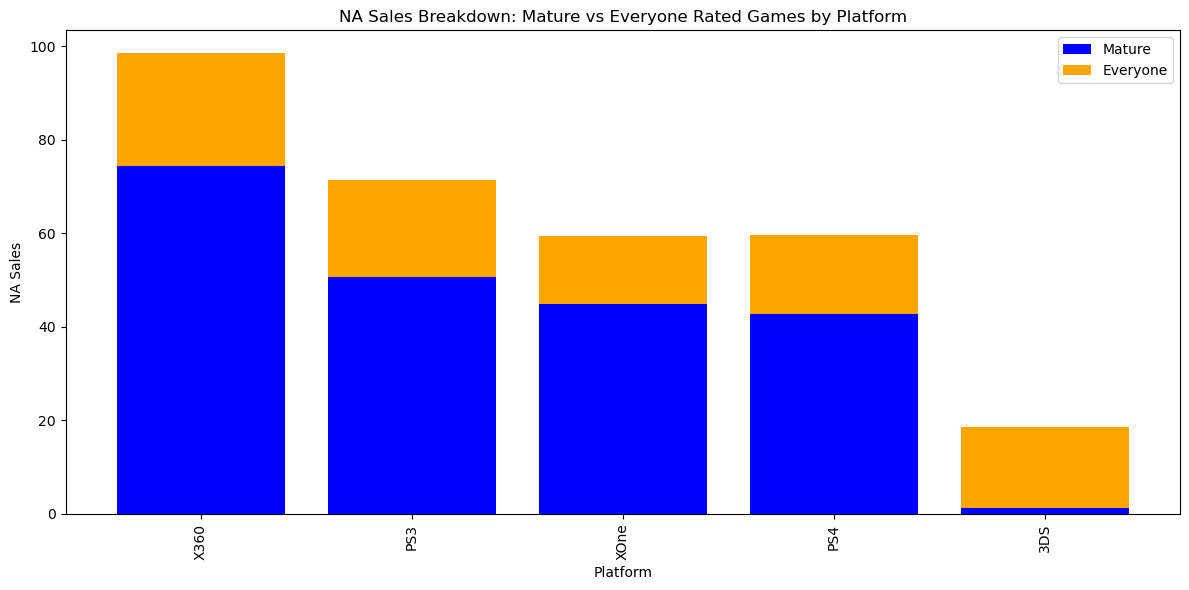

In [156]:
# Visualization

# Merging dataframes
merged_sales = na_mature.merge(na_everyone, on='platform', suffixes=('_mature', '_everyone'))

plt.figure(figsize=(12,6))

# Stacked bars
plt.bar(merged_sales['platform'], merged_sales['na_sales_mature'], label='Mature', color='blue')
plt.bar(merged_sales['platform'], merged_sales['na_sales_everyone'], bottom=merged_sales['na_sales_mature'], label='Everyone', color='orange')

# Adding labels and title
plt.xlabel('Platform')
plt.ylabel('NA Sales')
plt.title('NA Sales Breakdown: Mature vs Everyone Rated Games by Platform')
plt.xticks(rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [157]:
# EU sales

# NA sales
eu_mature = mature_rating.groupby('platform')['eu_sales'].sum().reset_index()
eu_everyone = everyone.groupby('platform')['eu_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
eu_mature = eu_mature.sort_values(by='eu_sales', ascending=False)
eu_everyone= eu_everyone.sort_values(by='eu_sales', ascending=False)

print(eu_sorted.head(5))
print(eu_everyone.head(5))

# average of the na_sales column
average_sales_mature = eu_mature['eu_sales'].mean()
print(average_sales_mature)

# average of the na_sales column
average_sales_everyone = eu_everyone['eu_sales'].mean()
print(average_sales_everyone)



## In the EU, In the NA region: Movies that are rated as 'mature' have higher sales than movies rated for 'everyone'

           genre  eu_sales
0         Action    136.51
8        Shooter    102.87
10        Sports     63.30
7   Role-Playing     38.04
6         Racing     22.70
  platform  eu_sales
2      PS4     27.56
1      PS3     24.75
0      3DS     14.64
3     X360     14.30
4     XOne     10.46
34.513999999999996
18.342000000000002


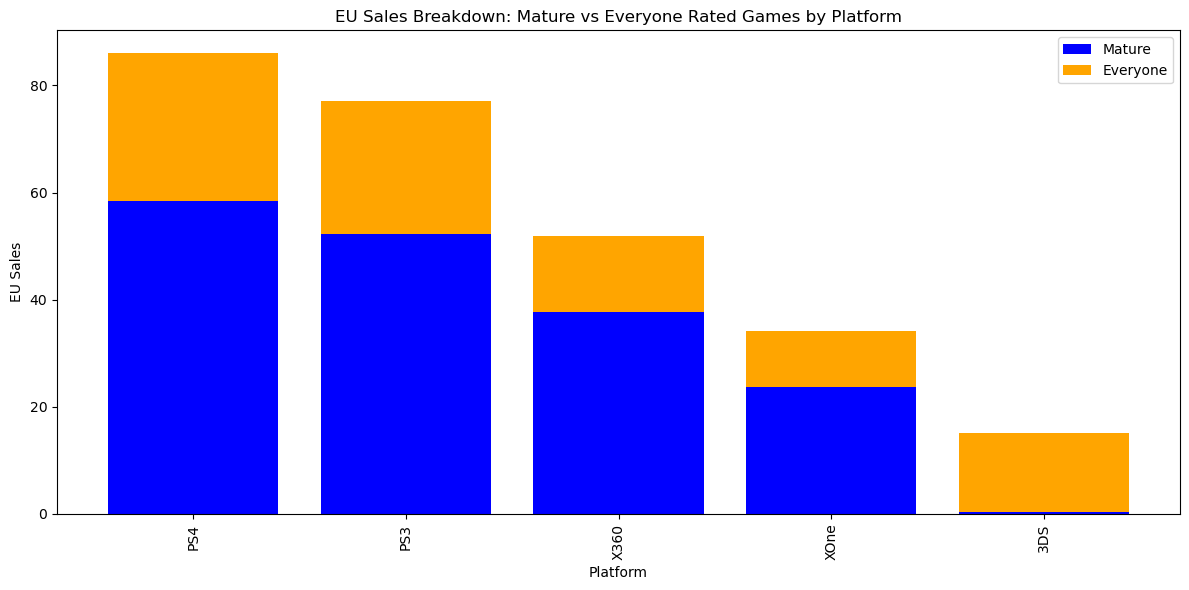

In [158]:
# Visualization

# Merging dataframes
merged_sales = eu_mature.merge(eu_everyone, on='platform', suffixes=('_mature', '_everyone'))

plt.figure(figsize=(12,6))

# Stacked bars
plt.bar(merged_sales['platform'], merged_sales['eu_sales_mature'], label='Mature', color='blue')
plt.bar(merged_sales['platform'], merged_sales['eu_sales_everyone'], bottom=merged_sales['eu_sales_mature'], label='Everyone', color='orange')

# Adding labels and title
plt.xlabel('Platform')
plt.ylabel('EU Sales')
plt.title('EU Sales Breakdown: Mature vs Everyone Rated Games by Platform')
plt.xticks(rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [159]:
# JP sales

# NA sales
jp_mature = mature_rating.groupby('platform')['jp_sales'].sum().reset_index()
jp_everyone = everyone.groupby('platform')['jp_sales'].sum().reset_index()

# Sort the platforms by total sales in descending order to see the most successful platforms
jp_mature = jp_mature.sort_values(by='jp_sales', ascending=False)
jp_everyone= jp_everyone.sort_values(by='jp_sales', ascending=False)

print(jp_sorted.head(5))
print(jp_everyone.head(5))

# average of the na_sales column
average_sales_mature = jp_mature['jp_sales'].mean()
print(average_sales_mature)

# average of the na_sales column
average_sales_everyone = jp_everyone['jp_sales'].mean()
print(average_sales_everyone)

## Movies rated mature also have greater sales in JP.


          genre  jp_sales
7  Role-Playing     49.49
0        Action     40.95
9    Simulation     10.23
8       Shooter      7.58
2      Fighting      7.41
  platform  jp_sales
0      3DS     16.29
1      PS3      2.76
2      PS4      0.84
3     X360      0.05
4     XOne      0.04
3.7920000000000007
3.996


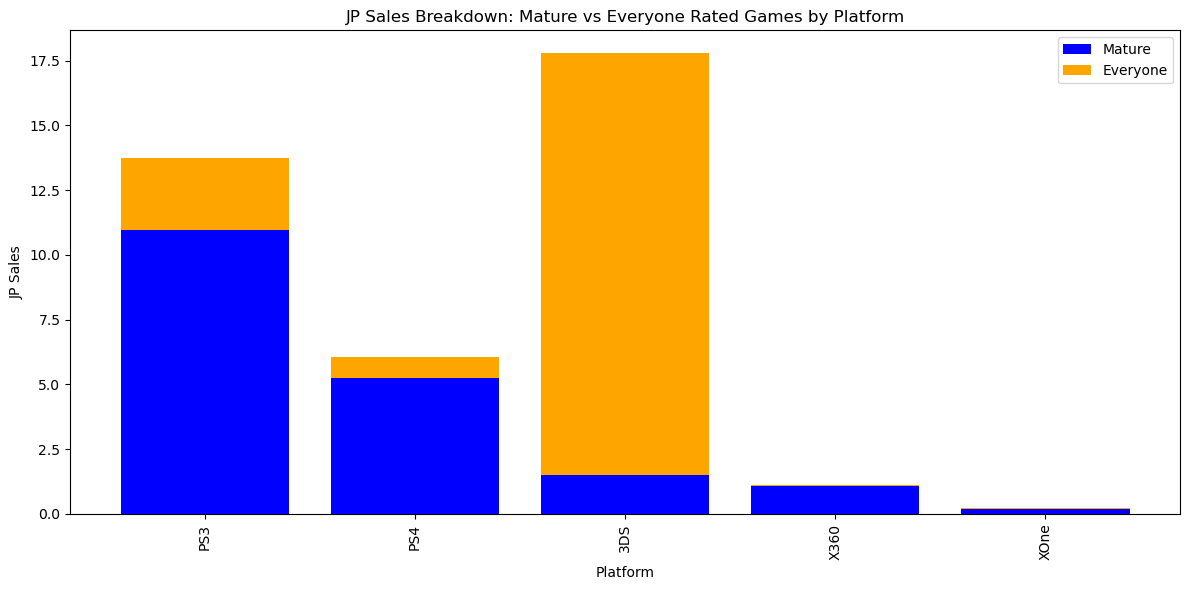

In [160]:
# Visualization

# Merging dataframes
merged_sales = jp_mature.merge(jp_everyone, on='platform', suffixes=('_mature', '_everyone'))

plt.figure(figsize=(12,6))

# Stacked bars
plt.bar(merged_sales['platform'], merged_sales['jp_sales_mature'], label='Mature', color='blue')
plt.bar(merged_sales['platform'], merged_sales['jp_sales_everyone'], bottom=merged_sales['jp_sales_mature'], label='Everyone', color='orange')

# Adding labels and title
plt.xlabel('Platform')
plt.ylabel('JP Sales')
plt.title('JP Sales Breakdown: Mature vs Everyone Rated Games by Platform')
plt.xticks(rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


### Step 5. Testing hypotheses

Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same:

* Null hypothesis: The average user ratings of the Xbox One and PC platforms are the same.
* Alternative hypothesis: The average user ratings of the Xbox One and PC platforms are not the same.
  


In [161]:
games2['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [162]:
# Filter for Xbox One and PC platforms 
xbox=games2[games2['platform'] == 'XOne']
xbox_sample=xbox['user_score']

pc=games2[games2['platform'] == 'PC']
pc_sample=pc['user_score']

In [163]:
type(xbox_sample)

pandas.core.series.Series

In [164]:
np.var(xbox_sample)


1.8965188383045526

In [165]:
np.var(pc_sample)

2.7569952398906588

In [166]:
xbox_sample = xbox_sample.dropna()
pc_sample = pc_sample.dropna()

alpha = 0.05  # critical statistical significance level
# This 5% threshold is one common measure of statistical significance. 

results = st.ttest_ind(xbox_sample, pc_sample)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


## We can't reject the null hypothesis. It is possible the platforms are the same.

p-value:  0.5535080500643661
We can't reject the null hypothesis


Hypothesis 2: Average user ratings for the Action and Sports genres are different:

* Null hypothesis: Average user ratings for the Action and Sports genres are different.
* Alternative hypothesis: Average user ratings for the Action and Sports genres are the same.



In [167]:
# Filter for Action and Sports genres
action=games2[games2['genre'] == 'Action']
action_sample=action['user_score']

sport=games2[games2['genre'] == 'Sports']
sport_sample=sport['user_score']

In [168]:
action_sample = action_sample.dropna()
sport_sample = sport_sample.dropna()

alpha = 0.05  


results = st.ttest_ind(action_sample, sport_sample)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

## we can reject null and conclude that user ratings for sport and action are different.

p-value:  3.7163089460934874e-26
We reject the null hypothesis


## Step 6: conclusions

*Genre Sales Performance:*
* The top three genres with the highest total sales are action, sports, and shooter, while puzzle genre has the lowest sales. This insight could be useful for targeting certain genres in advertising or game development strategies.
* Game developers and advertisers should prioritize targeting these high-performing genres, allocating more marketing resources to attract players interested in Action, Sports, and Shooter games.
* Puzzle games might require specialized marketing to target certain audiences, and developers should consider whether creating new puzzle games offers a strong return on investment.

*Platform performance:*
* The platforms with the highest sales include PS4,  PS, and   X360.
* A special focus is placed on identifying platforms that had historical sales but zero sales in the most recent year (obsolete platforms: DS and PSP SNES, and PS). These platforms are no longer generating sales, indicating a shift in market trends toward newer consoles.
* For developers, this highlights the importance of creating games for consoles that have a large user base. However, the focus should remain on newer platforms like PS4 to stay aligned with market trends.

*Region differences by platform:*
* NA sales PS3, PS4 and X360
* EU sales dominated by PS3, X360, and a strong preference for PS3, PS4, and DS PS3, and Wii
* JP sales dominated by 3DS, PS3, and PS496
* Advertising strategies should be tailored by region. For examplePlaystation x games should focus on the North Americaand European n market, while PlayStation an3d DS titles can prioritize marketing d Japan.

*Region differences by genre:*
* In NA and EUa Action is the most popular genre
* In JP, role-playing is the most popular genre followed by action
* Game developers should focus on creating role-playing games for the Japanese market, as these have the most appeal, while continuing to develop action games for botNA and EU n markets.

*Regional differences and ESRB ratings:*
* In all regions: Movies that are rated as 'Everyone' have lower sales than movies rateas 'Mature'.'.
* Game developers targeting global markets should prioritize creating "Mature" ratings to maximize saless.
